In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.io import loadmat
%matplotlib inline

In [2]:
input_layer_size = 400
num_labels = 10

In [3]:
mat = loadmat("ex3data1.mat")

In [4]:
X = mat['X']
y = mat['y']
m = X.shape[0]

In [5]:
np.random.randint(0,5000)

689

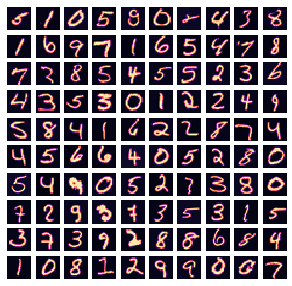

In [6]:
# Make 100 subplots to plot each digit
fig, axes = plt.subplots(10,10,figsize=(5,5))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(X[np.random.randint(0,5000),:].reshape(20,20, order = "F"),cmap="magma")
        axes[i,j].axis("off")

In [7]:
m = X.shape[0]
n = X.shape[1]

In [8]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [9]:
((X.T @ y)[1:]).shape

(399, 1)

In [10]:
def CostFunctionRegularization(X, y, theta, l):
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n,1))
    ghx = sigmoid(X @ theta)
    tosum = (y * np.log(ghx)) + ((1 - y) * np.log(1 - ghx))
    J = -sum(tosum)/m
    J = J + (l/(2*m)) * sum(theta[1:] ** 2)
    g0 = 1/m * (X.T @ (ghx-y))[0]
    g1 = 1/m * (X.T @ (ghx-y))[1:] + (l/m) * theta[1:]
    grad = np.vstack((g0[:,np.newaxis],g1))
    return J, grad    

In [11]:
theta_t = np.array([-2,-1,1,2])[:,np.newaxis]
X_t = np.hstack((np.ones((5,1)), np.arange(1,16).reshape(5,3, order = "F")/10))
y_t = np.array([1,0,1,0,1])[:,np.newaxis]
lambda_t = 3

input_layer_size  = 400
num_labels = 10
l = 0.2

In [12]:
J, grad = CostFunctionRegularization(X_t, y_t, theta_t, lambda_t)

In [13]:
print(J,grad)

[2.5348194] [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


In [14]:
def GradientDescent(X, y, theta, alpha, num_iters, l):
    m = X.shape[0]
    n = X.shape[1]
    J_history = []
    for i in range(num_iters):
        cost, grad = CostFunctionRegularization(X, y, theta, l)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    return theta, J_history

In [15]:
def OneVsAll(X, y, num_labels, l,alpha,num_iters):
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    n = X.shape[1]
    all_J = []
    all_theta = np.zeros((num_labels,n))
    for c in range(num_labels):
        digit = c if c else 10
        # c - 0 to 9
        # when c is 0 digit is 10 but index will be 0
        initial_theta = np.zeros((n,1))
        theta, J_history = GradientDescent(X,(y==digit) , initial_theta,alpha,num_iters,l)
        all_J.append(J_history)
        all_theta[c,:] = np.squeeze(theta)
    return all_theta, all_J

In [16]:
def PredictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    n = X.shape[1]
    p = np.zeros((m,1))
    ghx = sigmoid(X @ all_theta.T)
    return np.argmax(ghx,axis=1)

In [17]:
alpha = 1
l = 0.4
num_iters = 50
all_theta, all_J = OneVsAll(X,y,num_labels,l,alpha,num_iters)
x = np.hstack((np.ones((m,1)),X))
ghx = sigmoid(x @ all_theta.T)
pred = np.argmax(ghx,axis=1)
pred=[e if e else 10 for e in pred]
acc=np.mean(pred == y.flatten()) * 100
print("Accuracy = {}".format(acc))
# plt.plot(all_J[])

Accuracy = 88.44


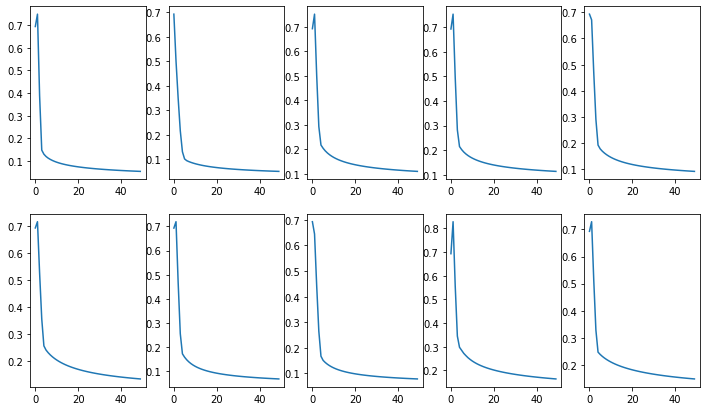

In [18]:
fig, axes = plt.subplots(2,5,figsize=(12,7))
p = 0
for i in range(2):
    for j in range(5):    
        axes[i,j].plot(all_J[p])
        p=p+1